### 일원분산분석
- 셋 이상의 그룹 간 차이가 존재하는지 확인
- 독립 표본 t검정을 여러번 했을 때, 아무리 높은 p-value가 나와도 신뢰성에 문제가 생길 수 있어 일원분산분석이 필요함
- 모든 그룹은 독립적, 정규성, 등분산성이 같아야함
- 그렇지 않으면 비모수적 방법인 Kruskal-Wallis H Test 수행
- scipy.stats.f_oneway : 일원분산분석
- statsmodels.stats.multicomp.pairwise_tukeyhsd(Data, Group) : 그룹 간 reject 결과 확인, True면 차이가 유의

In [2]:
import pandas as pd
df = pd.read_csv("지점별_일별판매량.csv", engine = "python", encoding = 'euc-kr')
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [3]:
# 데이터 분할 (결측이 포함되어 있을 수 있으므로 dropna를 사용)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values

([<matplotlib.axis.XTick at 0x2490dc17f10>,
 <a list of 3 Text xticklabel objects>)

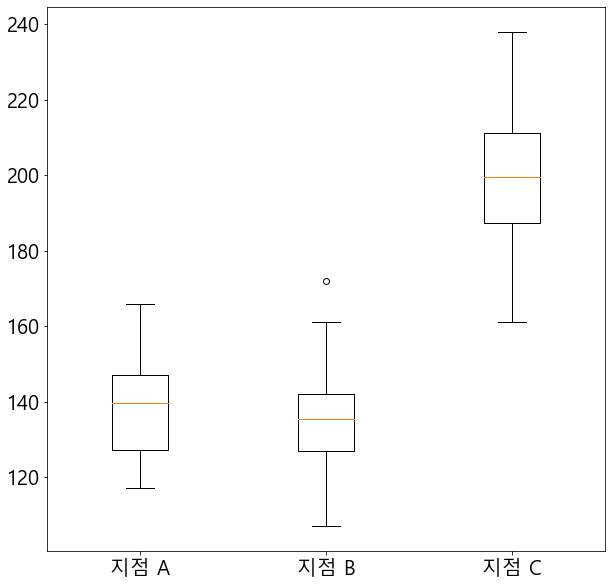

In [4]:
# 박스플롯으로 시각화
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 10)
plt.boxplot([A, B, C])
plt.xticks([1, 2, 3], ['지점 A', '지점 B', '지점 C'])

In [5]:
# 정규성 검정: 세 변수 모두 정규 분포를 띔을 확인
from scipy.stats import *
print(kstest(A, 'norm'))
print(kstest(B, 'norm'))
print(kstest(C, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [6]:
# 일원분산분석 수행: p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재
print(f_oneway(A, B, C))

F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)


In [7]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)
Data = A.tolist() + B.tolist() + C.tolist()

print(pairwise_tukeyhsd(Data, Group))

# 결론: [A, B] / [C]로 데이터가 구분됨
# A ~ B는 유의한 차이가 존재하지 않음
# A ~ C는 유의한 차이 존재
# B ~ C는 유의한 차이 존재 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B     -1.4   0.9 -10.5745  7.7745  False
     A      C  62.2333 0.001  53.0589 71.4078   True
     B      C  63.6333 0.001  54.4589 72.8078   True
----------------------------------------------------
